<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/a01139500_m2_retro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive" 
## desempeño predicciones
!ls

## puede que sea la caracteristica

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive
 acertados_test.pdf	 incorrectos_test.pdf	 scores_train.pdf
 acertados_train.pdf	 incorrectos_train.pdf	 scores_train.png
 acertados_valid.pdf	 incorrectos_valid.pdf	 scores_train.svg
'Colab Notebooks'	 iris.data		 scores_valid.pdf
'Documentos utiles'	 iris.names		'Servicio Social'
 EBSCO			 LiFE			'Sin ordenar'
 EGSGLP			'Plan de estudios'	 test.csv
 Fotos			 PlayDataset.csv	 train.csv
 gender_submission.csv	 Portugues		 Valhalla23.csv
 incorrectas_test.pdf	 real_estate.csv	 wine.data
 incorrectas_train.pdf	 real_state.csv		 wine.names
 incorrectas_valid.pdf	 scores_test.pdf


Se importan las librerías necesarias. sklearn solo se usa para hacer la división de datos de entrenamiento y prueba, y la matriz de confusión

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Se importa el CSV, se da nombre a las columnas, y se 

In [4]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
df["clase1"] = df["index"]==1
df["clase1"] = df["clase1"].astype(int)
df["clase2"] = df["index"]==2
df["clase2"] = df["clase2"].astype(int)
df["clase3"] = df["index"]==3
df["clase3"] = df["clase3"].astype(int)
df

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,clase1,clase2,clase3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


Visualización binaria de datos

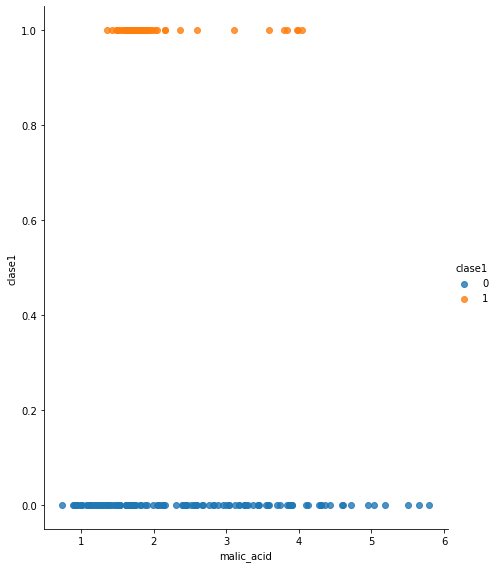

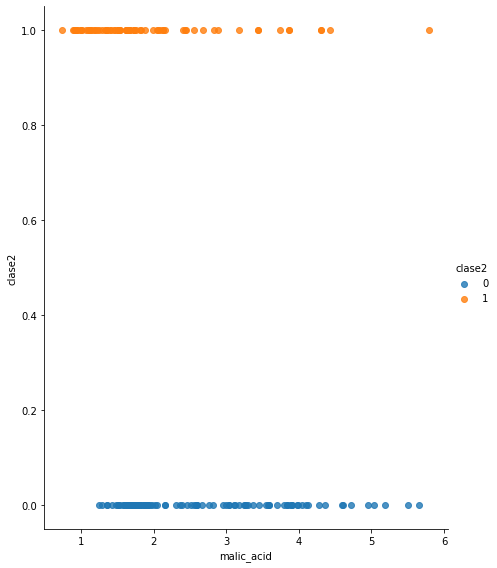

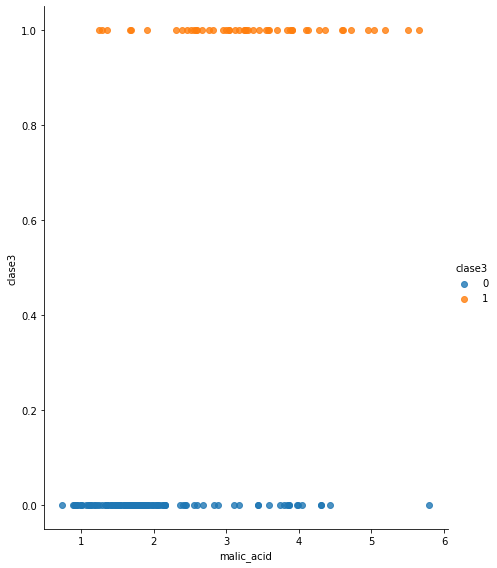

In [15]:
sns.lmplot(x='malic_acid',
           y='clase1',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase1', 
           legend=True)
sns.lmplot(x='malic_acid',
           y='clase2',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase2', 
           legend=True)
sns.lmplot(x='malic_acid',
           y='clase3',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase3', 
           legend=True)

## Separación de datos de entrenamiento y de prueba

Se hace la división entre datos de entrenamiento y datos de test


In [18]:
print('-------------CLASE 1-----------------')

x_train1, x_r, y_train1, y_r = train_test_split(df["malic_acid"], df['clase1'], test_size=0.33, random_state=0) ## el random state es semilla
x_valid1, x_test1, y_valid1, y_test1 = train_test_split(x_r, y_r, random_state=0)
funcion_de_clasificacion2(x_train1, x_valid1, y_train1, y_valid1)

print('-------------CLASE 2-----------------')

x_train2, x_r, y_train2, y_r = train_test_split(df["malic_acid"], df['clase2'], test_size=0.33, random_state=0)
x_valid2, x_test2, y_valid2, y_test2 = train_test_split(x_r, y_r, random_state=0)
funcion_de_clasificacion2(x_train2, x_valid2, y_train2, y_valid2)

print('-------------CLASE 3-----------------')

x_train3, x_r, y_train3, x_r= train_test_split(df["malic_acid"], df['clase3'], test_size=0.33, random_state=0)
x_valid3, x_test3, y_valid3, y_test3 = train_test_split(x_r, y_r, random_state=0)
funcion_de_clasificacion2(x_train3, x_valid3, y_train3, y_valid3)

-------------CLASE 1-----------------
[0.9999375341379332, 0.9998368095615097, 0.009474447097514138]
[8.0089, 15.0544, 14.6689, 6.6564000000000005, 18.49, 3.6864, 7.617599999999999, 2.3409, 18.3184, 1.8496000000000004, 1.6641000000000001, 2.5921000000000003, 0.8464, 4.2025, 2.8899999999999997, 2.3409, 8.940100000000001, 1.0201, 12.8881, 2.9929, 1.1449, 5.9049000000000005, 2.5281000000000002, 2.2801, 12.7449, 2.9240999999999997, 3.9601, 7.1289, 3.0976, 9.610000000000001, 1.2100000000000002, 4.6225, 2.9929, 10.6276, 2.7224999999999997, 2.7224999999999997, 3.3489000000000004, 15.288100000000002, 3.4596000000000005, 2.9929, 2.7889, 2.8223999999999996, 1.1881000000000002, 0.5476]
J valid
 -1.2096826795539253
J entrenamiento 
 -1.2416775465134569
theta 
 [0.9999375341379332, 0.9998368095615097, 0.009474447097514138]
-------------CLASE 2-----------------
[0.9999442565223989, 0.9998478425313231, 0.009510118021537126]
[8.0089, 15.0544, 14.6689, 6.6564000000000005, 18.49, 3.6864, 7.6175999999999

## Función de clasificación

Se presenta la funcion a la que se le da como input la clase que se busca clasificar.

In [8]:
def funcion_de_clasificacion(x_train, x_test, y_train, y_test):
  
  # se hace una regresión logistica de orden 1

  h   = lambda x,theta: 1/(1+np.exp(-(theta[0]+theta[1]*x))) ## cambiar a la logistica (LISTO)
  j_i = lambda x,y,theta: y*np.log(h(x,theta))+(1-y)*math.log(1-h(x,theta)) ## cambiar a y*log(h)+-y, ... diapositiva sesion 4. diapositiva 6 (LISTO)
  
  alpha = 0.00001 ## si es correcto tomando en cuenta que es 1 caracteristica

  n = len(y_train)

  theta = [1,2] # Cambiar dependiendo del orden del modelo (un theta para cada dimensión de nuestros datos + 1)

  for idx in range(100000): ## subir a 50k o 100k
    acumDelta = []
    acumDeltaX = []
    for x_i, y_i in zip(x_train,y_train):
      acumDelta.append(h(x_i,theta)-y_i)
      acumDeltaX.append((h(x_i,theta)-y_i)*x_i)

    sJt0 = sum(acumDelta)
    sJt1 = sum(acumDeltaX)
    theta[0] = theta[0]-alpha/n*sJt0
    theta[1] = theta[1]-alpha/n*sJt1

  print(theta)

  n_train = len(y_train)
  n_train = len(y_valid)
  n_test = len(y_test)

  # Validación
  acumDelta = []
  for x_i, y_i in zip(x_valid,y_valid):
    acumDelta.append(j_i(x_i,y_i,theta))  

  sDelta = sum(acumDelta)
  J_valid = 1/(2*n_test)*sDelta

  # Training
  acumDelta = []
  for x_i, y_i in zip(x_train,y_train):
    acumDelta.append(j_i(x_i,y_i,theta)) 

  sDelta = sum(acumDelta)
  J_train = 1/(2*n_train)*sDelta

  print("J valid\n", J_valid)
  print("J entrenamiento \n",J_train)
  print("theta \n",theta)

Se hace una función que considere el cuadrado de la característica

In [12]:
def funcion_de_clasificacion2(x_train, x_valid, y_train, y_valid):
  x2_train = []
  for x_i in x_train:
    x2_train.append(x_i**2)
  
  # se hace una regresión logistica de orden 1

  h   = lambda x,theta,x2: 1/(1+np.exp(-(theta[0]+theta[1]*x+theta[2]*x2))) ## cambiar a la logistica (LISTO)
  j_i = lambda x,y,theta,x2: y*np.log(h(x,theta,x2))+(1-y)*math.log(1-h(x,theta,x2)) ## cambiar a y*log(h)+-y, ... diapositiva sesion 4. diapositiva 6 (LISTO)
  
  alpha = 0.000000001 ## si es correcto tomando en cuenta que es 1 caracteristica

  n = len(y_train)

  theta = [1,1,0.01] # Cambiar dependiendo del orden del modelo (un theta para cada dimensión de nuestros datos + 1)
  n_train = len(y_train)
  for idx in range(100000): ## subir a 50k o 100k
    acumDelta = []
    acumDeltaX = []
    acumDeltaX2 = []
    for x_i, y_i,x2_i in zip(x_train,y_train,x2_train):
      acumDelta.append(h(x_i,theta,x2_i)-y_i)
      acumDeltaX.append((h(x_i,theta,x2_i)-y_i)*x_i)
      acumDeltaX2.append((h(x_i,theta,x2_i)-y_i)*x2_i) # Acumular para el nuevo theta
      

    sJt0 = sum(acumDelta)
    sJt1 = sum(acumDeltaX)
    sJt2 = sum(acumDeltaX2)
    theta[0] = theta[0]-alpha/n*sJt0
    theta[1] = theta[1]-alpha/n*sJt1
    theta[2] = theta[2]-alpha/n_train*sJt2

  print(theta)

  x2_validate = []
  for x_i in x_valid:
    x2_validate.append(x_i**2)
  print(x2_validate)

  
  n_validate = len(y_valid)

  # Validación
  acumDelta = []
  for x_i, y_i,x2_i in zip(x_valid,y_valid,x2_validate):
    acumDelta.append(j_i(x_i,y_i,theta,x2_i))  

  sDelta = sum(acumDelta)
  J_validate = 1/(2*n_validate)*sDelta

  # Training
  acumDelta = []
  for x_i, y_i,x2_i in zip(x_train,y_train,x2_train):
    acumDelta.append(j_i(x_i,y_i,theta,x2_i)) 

  sDelta = sum(acumDelta)
  J_train = 1/(2*n_train)*sDelta

  print("J valid\n", J_validate)
  print("J entrenamiento \n",J_train)
  print("theta \n",theta)

## Predicciones

In [23]:
## se tomaron las thetas del print anterior.

#theta1 = [0.8173508461366985,-0.11156093037021975]; theta2 = [0.858640063015907,-0.10581596126042006]; theta3 = [0.8313672112517582,-0.13650392087898205]; ## ya se cambiaron con los cambios en la función logistica

## Ahora cambiaste esto para grado 2, de modo que son 3 thetas

theta1 = [0.9999327731740513,0.9991525134031853,-0.0007138908887866311]; theta2 = [0.9999394958645746,0.9991867907324294,-0.0009496085596657918]; theta3 = [0.999927731166758,0.9990662782283452,-0.0021209209974437154];

print("----------------------------PARA CLASE 1--------------------------------------------")
## ----------------------------PARA CLASE 1--------------------------------------------##

## se hace una matriz con los valores 

## train

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_train1+theta1[2]*x_train1**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_train1+theta2[2]*x_train1**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_train1+theta3[2]*x_train1**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_train_1 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_train_1)

## valid

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_valid1+theta1[2]*x_valid1**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_valid1+theta2[2]*x_valid1**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_valid1+theta3[2]*x_valid1**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_valid = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_valid = pd.DataFrame(comparacion_valid)

maxValueIndex_valid_1 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_valid_1)

## test

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_test1+theta1[2]*x_test1**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_test1+theta2[2]*x_test1**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_test1+theta3[2]*x_test1**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_test_1 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_test_1)

print("----------------------------PARA CLASE 2--------------------------------------------")
## ----------------------------PARA CLASE 2--------------------------------------------##
## train

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_train2+theta1[2]*x_train2**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_train2+theta2[2]*x_train2**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_train2+theta3[2]*x_train2**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_train_2 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_train_2)

## valid

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_valid2+theta1[2]*x_valid2**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_valid2+theta2[2]*x_valid2**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_valid2+theta3[2]*x_valid2**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_valid = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_valid = pd.DataFrame(comparacion_valid)

maxValueIndex_valid_2 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_valid_2)

## test

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_test2+theta1[2]*x_test2**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_test2+theta2[2]*x_test2**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_test2+theta3[2]*x_test2**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_test_2 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_test_2)

## ## ----------------------------PARA CLASE 3--------------------------------------------##
print("----------------------------PARA CLASE 3--------------------------------------------")

## train

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_train3+theta1[2]*x_train3**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_train3+theta2[2]*x_train3**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_train3+theta3[2]*x_train3**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_train_3 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_train_3)

## valid

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_valid3+theta1[2]*x_valid3**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_valid3+theta2[2]*x_valid3**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_valid3+theta3[2]*x_valid3**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_valid = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_valid = pd.DataFrame(comparacion_train)

maxValueIndex_valid_3 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_valid_3)

## test

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_test3+theta1[2]*x_test3**2)))) ### cambiar para las tres, con la de logistica () LISTO
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_test3+theta2[2]*x_test3**2))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_test3+theta3[2]*x_test3**2))))  ## se usa np log en vez de math.log porque math.log no espera un array

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_test_3 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_test_3)

----------------------------PARA CLASE 1--------------------------------------------
0      1
1      1
2      1
3      1
4      1
      ..
114    1
115    1
116    1
117    1
118    1
Length: 119, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
114    1
115    1
116    1
117    1
118    1
Length: 119, dtype: int64
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
dtype: int64
----------------------------PARA CLASE 2--------------------------------------------
0      1
1      1
2      1
3      1
4      1
      ..
114    1
115    1
116    1
117    1
118    1
Length: 119, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
114    1
115    1
116    1
117    1
118    1
Length: 119, dtype: int64
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
dtype: int64
----------------------------PARA CLASE 3------------------------

## Matriz de confusión

Se presenta la matriz de confusión con base en los valores obtenidos de las pruebas. Se obtiene usando la librería de sklearn importada más arriba

In [22]:
print("Matriz de confusión para train 1")
print(confusion_matrix(y_train1,maxValueIndex_train_1))
print("Matriz de confusión para valid 1")
print(confusion_matrix(y_valid1,maxValueIndex_valid_1))
print("Matriz de confusión para test 1")
print(confusion_matrix(y_test1,maxValueIndex_test_1))

print("Matriz de confusión para train 2")
print(confusion_matrix(y_train2,maxValueIndex_train_2))
print("Matriz de confusión para valid 2")
print(confusion_matrix(y_valid2,maxValueIndex_valid_2))
print("Matriz de confusión para test 2")
print(confusion_matrix(y_test2,maxValueIndex_test_2))

print("Matriz de confusión para train 3")
print(confusion_matrix(y_train3,maxValueIndex_train_3))
print("Matriz de confusión para train 3")
print(confusion_matrix(y_valid2,maxValueIndex_valid_2))
print("Matriz de confusión para test 3")
print(confusion_matrix(y_test3,maxValueIndex_test_3))

Matriz de confusión para train 1
[[ 0 80]
 [ 0 39]]
Matriz de confusión para valid 1


ValueError: ignored

## Notas de la asesoría

### Corrección en función

* Estaba usando la función de regresión en lugar de la logística.
  * Hace falta investigar cual es la función logística para escribirla correctamente.
    * No se te olvide importar Euler, que lo ocupas en una librería.
  * Recuerda cambiar la función j_i por la que viene en la sexta diapositiva de la ppt 4.

## Posibles fuentes de bajo rendimiento

* La característica que está siendo utilizada.

### Sobre la matríz de confusión

*  Los números en la diagonal son son predicciones corectas.

* Las que no están en la diagonal son cuando se identifica en una categoría cuando en realidad es en otra.

* Pacar matriz de confusión de 2x2 para cada clase.

  * y_pred_1 contra y_train 1, y hacer lo mismo para el test.